# Домашнее задание "Продвинутая линейная алгебра".

### Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!


In [71]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import f_oneway
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [72]:
A = np.array([[(-1), 0], [0, 1]])
A

array([[-1,  0],
       [ 0,  1]])

In [73]:
A @ np.transpose(A)

array([[1, 0],
       [0, 1]])

A удовлетворяет условиям a, b и с: она ортогональная, диагональная, а значит, также верхнетреугольная и нижнетреугольная.

In [74]:
# Несколько решений для пункта d
d_list = []
for x, y, z, k in itertools.permutations(list(range(1, 6)), 4):
    if x * k - y * z == 1:
        d_answer = np.array([[x, y], [z, k]])
        print(d_answer)
        d_list.append(d_answer)

[[2 1]
 [5 3]]
[[2 5]
 [1 3]]
[[3 1]
 [5 2]]
[[3 5]
 [1 2]]


In [75]:
# Проверяю, что определитель везде равен единице
for matrix in d_list:
    print(round(np.linalg.det(matrix), 2))

1.0
1.0
1.0
1.0


Найдите собственные значения и собственные вектора матриц:

```
m = np.array([[2, 2],
              [1, 3]])
print(m)
```

In [76]:
m = np.array([[2, 2],
              [1, 3]])
w, v = np.linalg.eig(m)
print(w[0])
print(v[:, 0])

1.0
[-0.89442719  0.4472136 ]


In [77]:
for matrix in [A] + d_list:
    w, v = np.linalg.eig(matrix)
    print(f'Для матрицы{matrix} получены следующие результаты:')
    for i in range(len(w)):
        print(f'Собственное значение {i + 1} равняется {w[i]}.')
        print(f'Собственный вектор, соответствующий собственному значению {i + 1}, равняется {v[:,i]}.')
    print('')

Для матрицы[[-1  0]
 [ 0  1]] получены следующие результаты:
Собственное значение 1 равняется -1.0.
Собственный вектор, соответствующий собственному значению 1, равняется [1. 0.].
Собственное значение 2 равняется 1.0.
Собственный вектор, соответствующий собственному значению 2, равняется [0. 1.].

Для матрицы[[2 1]
 [5 3]] получены следующие результаты:
Собственное значение 1 равняется 0.20871215252207964.
Собственный вектор, соответствующий собственному значению 1, равняется [-0.48744474  0.87315384].
Собственное значение 2 равняется 4.7912878474779195.
Собственный вектор, соответствующий собственному значению 2, равняется [-0.33726692 -0.94140906].

Для матрицы[[2 5]
 [1 3]] получены следующие результаты:
Собственное значение 1 равняется 0.20871215252207964.
Собственный вектор, соответствующий собственному значению 1, равняется [-0.94140906  0.33726692].
Собственное значение 2 равняется 4.7912878474779195.
Собственный вектор, соответствующий собственному значению 2, равняется [-0.873

### Уровень 1:


Найдите спектральное разложение матрицы:

```
m = np.array([[1, 2],
              [2,3]])
print(m)
```


In [78]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [79]:
w1, v1 = np.linalg.eig(m)
print(f'Собственные значения: {w1[0]}, {w1[1]}')
print(f'Матрица из собственных векторов: {v1}')

Собственные значения: -0.2360679774997898, 4.23606797749979
Матрица из собственных векторов: [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [80]:
s_decomp = np.array(v1.dot(np.diag(w1).dot(v1.T)))
s_decomp

array([[1., 2.],
       [2., 3.]])

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*




У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html


In [81]:
# Скачиваю датасет с изображениями
digits = load_digits()

<Figure size 432x288 with 0 Axes>

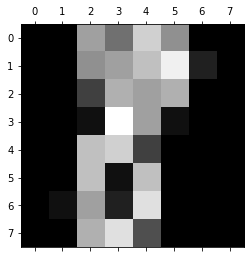

<Figure size 432x288 with 0 Axes>

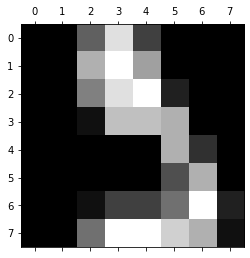

<Figure size 432x288 with 0 Axes>

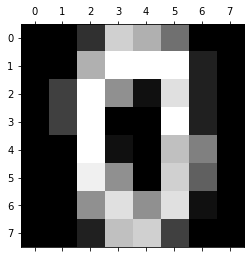

<Figure size 432x288 with 0 Axes>

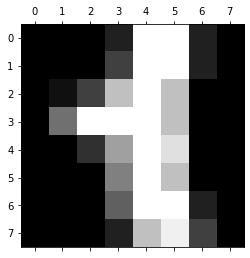

<Figure size 432x288 with 0 Axes>

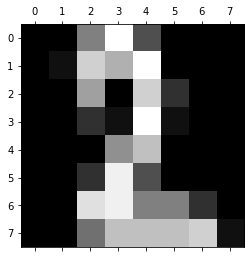

<Figure size 432x288 with 0 Axes>

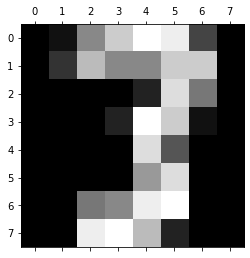

<Figure size 432x288 with 0 Axes>

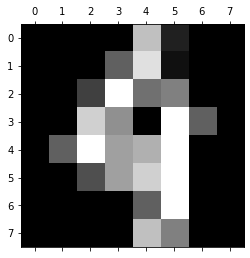

In [82]:
for i in range(18, 25):
    plt.gray() 
    plt.matshow(digits.images[i])
    plt.show() 

In [83]:
# Необходимо для каждого изображения провести операции трансформации методом PCA при n-components 1-7
# (у изображений 8 атрибутов) и восстановление после трансформаций.
# Данные об ошибках при восстановлении (MSE) нужно собрать в датафрейм для анализа.
# Создаю датафрейм
pca_errors = pd.DataFrame(columns = ['image_index', 'n_components', 'meaning'])

,image_index,n_components,meaning


In [84]:
# Заполняю его данными
for i in range(len(images)):
    for j in range(1, 8):
        pca = PCA(n_components = j)
        trans = pca.fit_transform(images[i])
        restored = pca.inverse_transform(trans)
        error = mean_squared_error(images[i], restored)
        pca_errors = pca_errors.append(pd.DataFrame(data = [[i, j, error]],
                                                    columns = ['image_index', 'n_components', 'meaning']),
                                                    ignore_index = True)

In [85]:
pca_errors

,image_index,n_components,meaning
0,0,1,4.609204e+00
1,0,2,1.168867e+00
2,0,3,3.355939e-01
3,0,4,2.371726e-02
4,0,5,1.683267e-03
...,...,...,...
12574,1796,3,5.989848e-01
12575,1796,4,1.449986e-01
12576,1796,5,1.106724e-02
12577,1796,6,7.863379e-30


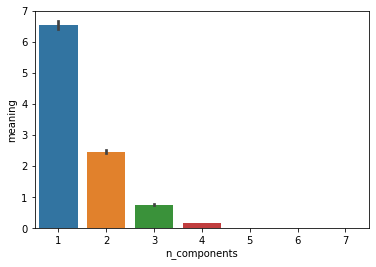

In [99]:
# Рисую график, который демонстрирует обратную линейную зависимость MSE от n_components
sns.barplot(x='n_components', y = 'meaning', data = pca_errors);

In [70]:
# Считаю средние значения MSE для операций с разным значением n_components
pca_errors.groupby(pca_errors.n_components).mean()

,meaning
n_components,
1,6.543179e+00
2,2.471298e+00
3,7.630356e-01
4,1.664597e-01
5,2.053486e-02
6,1.515602e-04
7,2.150430e-29


In [98]:
# Провожу дисперсионный анализ, чтобы убедиться, что различия значимы.
f_oneway(pca_errors[(pca_errors.n_components == 1)].meaning, pca_errors[(pca_errors.n_components == 2)].meaning,
         pca_errors[(pca_errors.n_components == 3)].meaning, pca_errors[(pca_errors.n_components == 4)].meaning,
         pca_errors[(pca_errors.n_components == 5)].meaning, pca_errors[(pca_errors.n_components == 6)].meaning,
         pca_errors[(pca_errors.n_components == 7)].meaning)

F_onewayResult(statistic=8073.275839830092, pvalue=0.0)

Таким образом, при увеличении количества компонентов в PCA точность восстановления изображения увеличивается (показатель MSE снижается).